In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [94]:
%matplotlib inline

In [95]:
df_train = pd.read_csv("../data/train_users_2.csv")

### 컬럼 이해하기
- date_account_created : 처음 계정 생성한 날짜
- timestamp_first_avtive : 처음 활동한 날짜
- date_first_booking : 첫 예약 날짜
- gender : 성별
- age : 나이
- signup_method : 회원 가입 방법
- signup_flow : 회원 가입할 때 사용자 본 page 번호
- affiliate_channel : 유입 경로
- affiliate_provider : 유입 장소
- first_affiliate_tracked : 회원 가입 전 user가 반응한 첫번째 marketing
- signup_app : 모바일 앱 
- first_device_type : 첫 장치
- first_browser : 브라우저 종류
- country_destination : 첫 예약 국가

### 0. target data

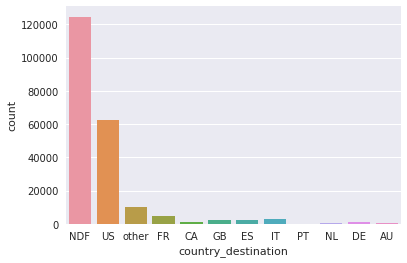

In [96]:
sns.countplot(df_train["country_destination"])

NDF에서 120000, US는 60000, other : 10000

### 1. 전체 데이터 보기

총 213450개의 데이터

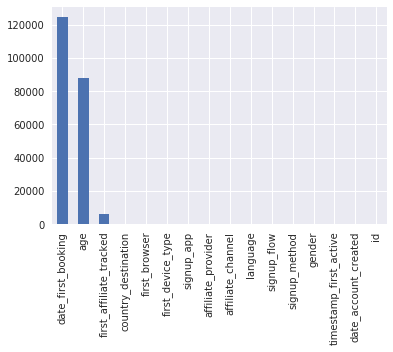

In [97]:
df_train.isnull().sum().sort_values(ascending = False).plot(kind="bar")

In [98]:
df_train.isnull().sum().sort_values(ascending = False) / len(df_train) *100

date_first_booking         58.347349
age                        41.222576
first_affiliate_tracked     2.841402
country_destination         0.000000
first_browser               0.000000
first_device_type           0.000000
signup_app                  0.000000
affiliate_provider          0.000000
affiliate_channel           0.000000
language                    0.000000
signup_flow                 0.000000
signup_method               0.000000
gender                      0.000000
timestamp_first_active      0.000000
date_account_created        0.000000
id                          0.000000
dtype: float64

- date_First_boking : 전체에서 58.3%이 결측값
- age : 전체에서 41.2%
- first_affiliate_tracked : 2.8% 유실

### 2. id

In [99]:
print("총 갯수 : {}, id 갯수 : {}".format(len(df_train["id"].unique()), len(df_train)))

총 갯수 : 213451, id 갯수 : 213451


- 중복되는 값이 없다.

### 3. date_account_created

In [100]:
df_train["date_account_created"].min(), df_train["date_account_created"].max()

('2010-01-01', '2014-06-30')

In [101]:
df_train["date_account_created"] = pd.to_datetime(df_train["date_account_created"], format = "%Y-%m-%d")

In [102]:
df_train["ac_year"] = df_train["date_account_created"].apply(lambda x : df_train["ac_day"] = df_train["date_account_created"].apply(lambda x : x.day))
df_train["ac_month"] = df_train["date_account_created"].apply(lambda x : x.month)
df_train["ac_day"] = df_train["date_account_created"].apply(lambda x : x.day)

In [ ]:
df_train["ac_year_day"] = df_train["date_account_created"].apply(lambda x : x.day)

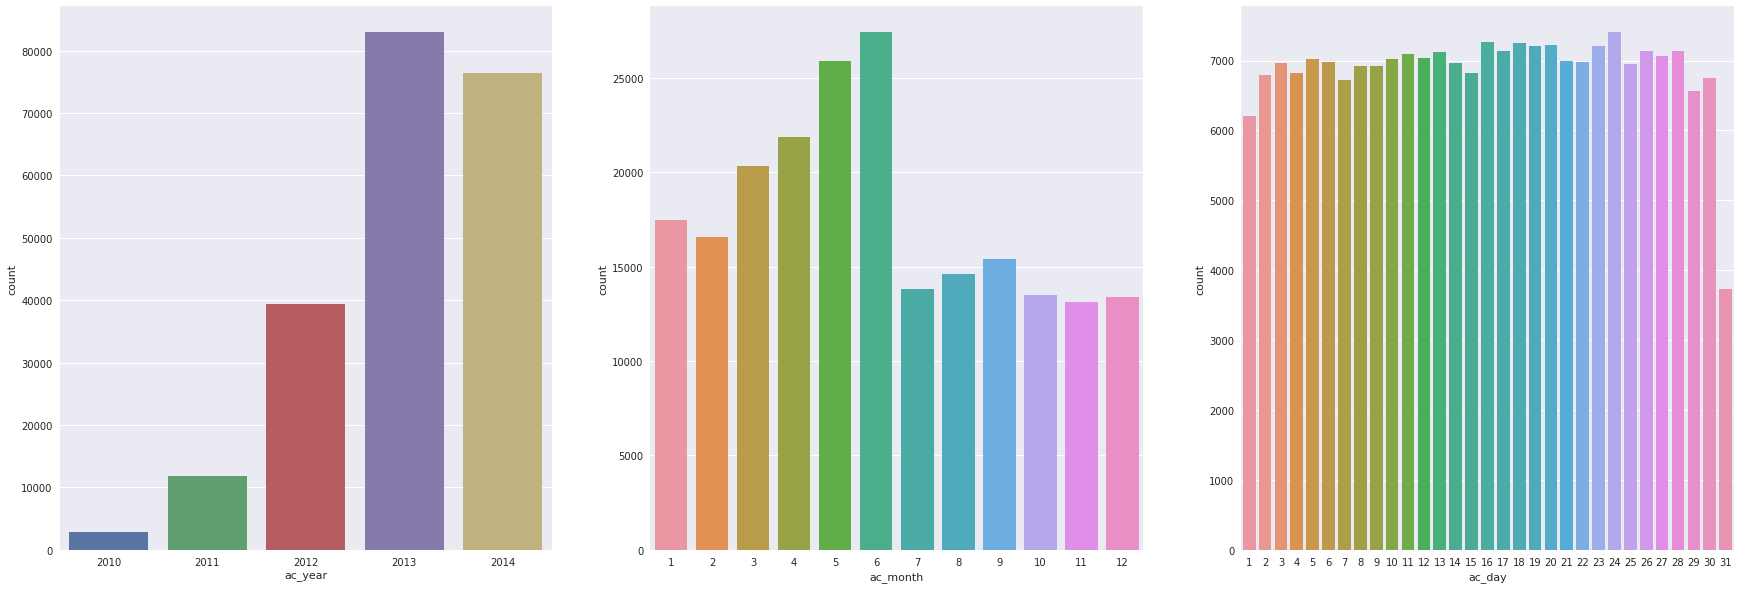

In [103]:
fig, axes = plt.subplots(1, 3, figsize = (30, 10))
sns.countplot(df_train["ac_year"], ax=axes[0])
sns.countplot(df_train["ac_month"], ax=axes[1])
sns.countplot(df_train["ac_day"], ax=axes[2])

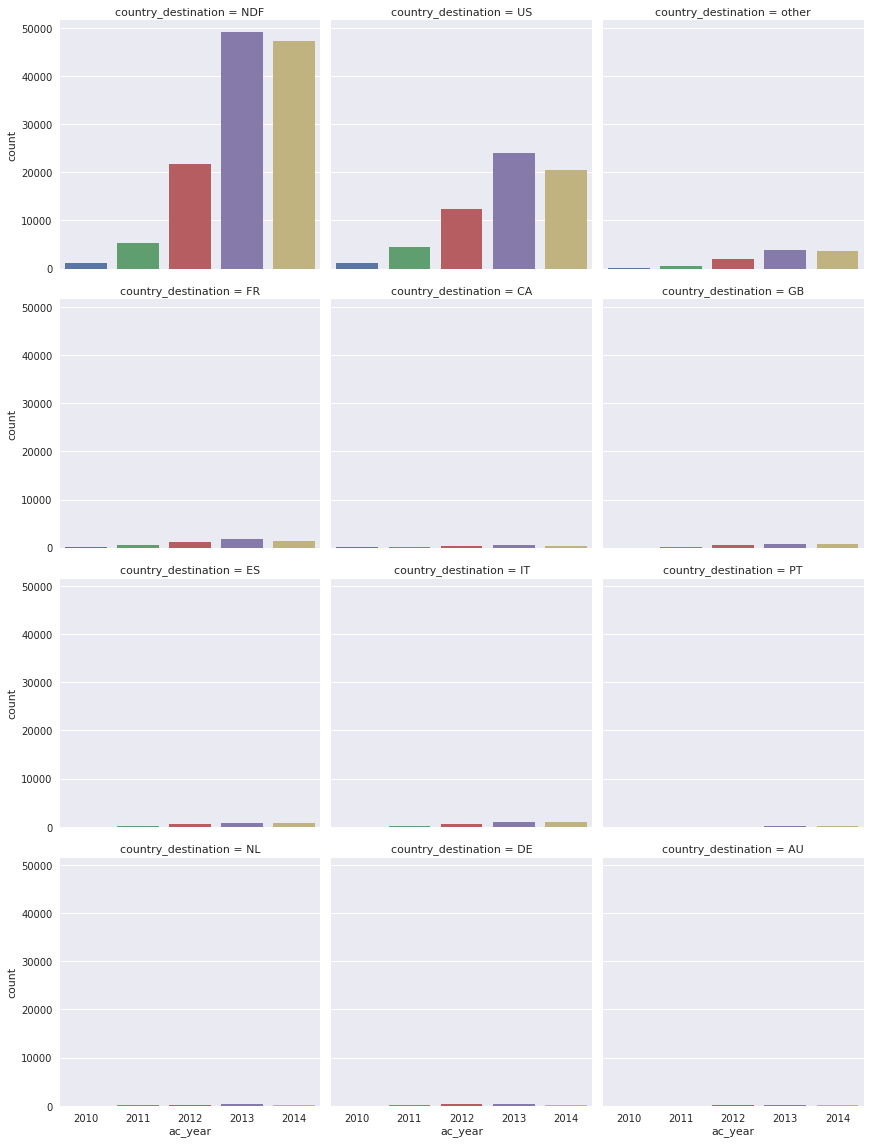

In [110]:
sns.factorplot(x = "ac_year", col = "country_destination", col_wrap=3, data=df_train, kind="count")

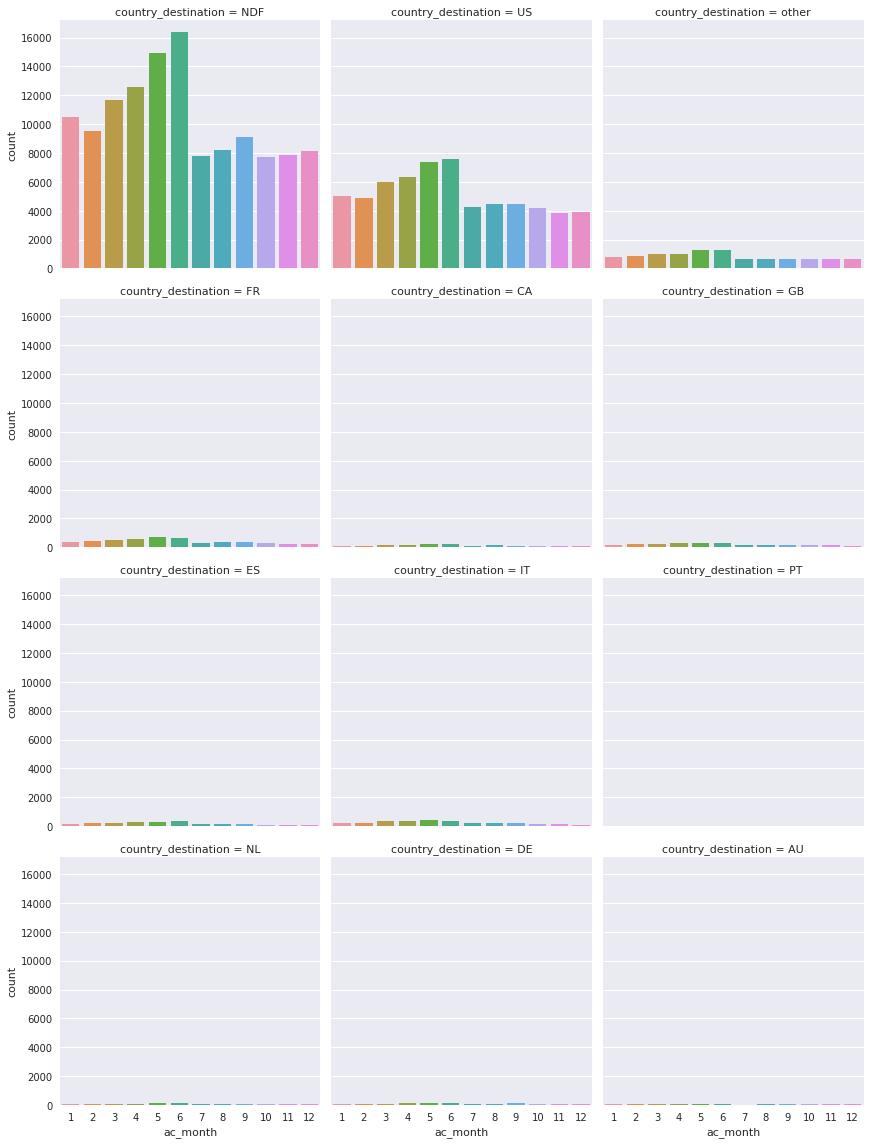

In [112]:
sns.factorplot(x = "ac_month", col = "country_destination", col_wrap=3, data=df_train, kind="count")

### 4. timestamp_first_active

In [ ]:
df_train["timestamp_first_active"] = pd.to_datetime(df_train["timestamp_first_active"], format="%Y%m%d%H%M%S", errors='ignore')

In [ ]:
df_train["fa_year"] = df_train["timestamp_first_active"].apply(lambda x : x.year)
df_train["fa_month"] = df_train["timestamp_first_active"].apply(lambda x : x.month)
df_train["fa_day"] = df_train["timestamp_first_active"].apply(lambda x : x.day)
df_train["fa_hour"] = df_train["timestamp_first_active"].apply(lambda x : x.hour)

### 5. Gender

In [ ]:
sns.countplot(df_train["gender"])

In [ ]:
np.mean([1, 2])

In [ ]:
df_train["count"] = 1

In [ ]:
df_gender_country = df_train.pivot_table(values = "count", index = ["country_destination"], columns = ["gender"], aggfunc=np.sum)

In [ ]:
df_gender_country["-unknown-"] = df_gender_country["-unknown-"] / df_gender_country["-unknown-"].sum() * 100
df_gender_country["FEMALE"] = df_gender_country["FEMALE"] / df_gender_country["FEMALE"].sum() * 100
df_gender_country["MALE"] = df_gender_country["MALE"] / df_gender_country["MALE"].sum() * 100
df_gender_country["OTHER"] = df_gender_country["OTHER"] / df_gender_country["OTHER"].sum() * 100

In [ ]:
fig, ax = plt.subplots(figsize = (20, 10))
df_gender_country.plot(kind = "bar", ax = ax)

#### 남녀간에 차이를 나타낸 것 (female - male)

In [ ]:
(df_gender_country["FEMALE"] - df_gender_country["MALE"]).sort_values(ascending = False).plot(kind="bar")

- 남자보다 여자 airbnb를 더 많이 사용한다.
- 남자가 더 많이 가는 나라 : other, DE, CA, NL
- 여자가 더 많이 가는 나라 : FR, IT, US, NDF, GB, ES 
- 별차이가 없는 것 : PT, AU

### 6. Signup_method

In [ ]:
sns.countplot(df_train["signup_method"])

In [ ]:
df_sign_country = df_train.pivot_table(values = "count", index = ["country_destination"], columns = ["signup_method"], aggfunc=np.sum)

In [ ]:
df_sign_country

In [ ]:
df_sign_country["basic"] = df_sign_country["basic"] / df_sign_country["basic"].sum() * 100
df_sign_country["google"] = df_sign_country["google"] / df_sign_country["google"].sum() * 100
df_sign_country["facebook"] = df_sign_country["facebook"] / df_sign_country["facebook"].sum() * 100

In [ ]:
df_sign_country

In [ ]:
fig, ax = plt.subplots(figsize = (20, 10))
df_sign_country.plot(kind = "bar", ax = ax)

In [ ]:
print(df_sign_country["basic"].sort_values(ascending = False).index)

In [ ]:
print(df_sign_country["facebook"].sort_values(ascending = False).index)

In [ ]:
print(df_sign_country["google"].sort_values(ascending = False).index)

#### 방식 차이를 나타낸 것 (basic - facebook)

In [ ]:
(df_sign_country["basic"] - df_sign_country["facebook"]).sort_values(ascending = False).plot(kind="bar")

- basic : US, other, FR, IT, CA, GB
- 상관없음 : NL, AU, PT, ES, DE
- facebook : NDF

### 7. signup_app

In [ ]:
sns.countplot(df_train["signup_app"])

In [ ]:
df_signApp_country = df_train.pivot_table(values = "count", index = ["country_destination"], columns = ["signup_app"], aggfunc=np.sum)

In [ ]:
for col in list(df_signApp_country.columns):
    df_signApp_country[col] = df_signApp_country[col] / df_signApp_country[col].sum() * 100

In [ ]:
fig, ax = plt.subplots(figsize = (20, 10))
df_signApp_country.plot(kind = "bar", ax= ax)

In [ ]:
df_signApp_country

#### Web과 Android의 차이 방식 (Web - Android)

In [ ]:
(df_signApp_country["Web"] - df_signApp_country["Android"]).sort_values(ascending = False).plot(kind="bar")

#### Web과 Android의 차이 방식 (Web - ios)

In [ ]:
(df_signApp_country["Web"] - df_signApp_country["iOS"]).sort_values(ascending = False).plot(kind="bar")

- Web으로 가입하는 경우에는 US가 여행지인 경우가 많다
- Anroid 또는 iOS인 경우에는 NDF인 경우가 많다.

### 8. affiliate_channel

- 유입 경로

In [ ]:
list(df_train["affiliate_channel"].unique())

In [ ]:
sns.countplot(df_train["affiliate_channel"])

### 9. affiliate_provider

- 유입되는 probider

In [ ]:
list(df_train["affiliate_provider"].unique())

In [ ]:
sns.countplot(df_train["affiliate_provider"])

#### 10. date_first_booking

In [ ]:
df_train["date_first_booking"].head()

In [ ]:
df_train["date_first_booking"] = pd.to_datetime(df_train["date_first_booking"], format="%Y-%m-%d", errors='ignore')

### 11. Age

In [116]:
df_train["age"].describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

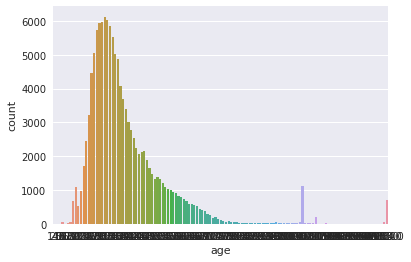

In [115]:
sns.countplot(df_train["age"])